# Analysis of user behavior in a mobile application

## Description of the project

Tasks:
1. To analyze the connection of the target event - viewing contacts - and others
user actions.
2. Evaluate what actions are more often performed by those users who
View contacts.

Stages of research:
Conduct a research data analysis
Analyze the impact of events on a targeted event
Check statistical hypotheses
1. Some users perform the actions of `tips_show` and `tips_click`, others -
Only `tips_show`. Check the hypothesis: conversion to contact views
It differs in these two groups.
2. The wording of the own statistical hypothesis.Her addition
zero and alternative hypotheses.Checking the hypothesis using
statistical test.
3. The final presentation

Data description:
Dataset contains data on events committed in a mobile application
"Unnecessary things."In it, users sell their unnecessary things, placing
Mobile applications - analysis of user behavior in the mobile application 2
There are on the board of ads.
Dataset contains data from users who first performed actions in
Appendix after October 7, 2019.

Columns in [/datasets/mobile_sources.csv](https://code.s3.yandex.net/datasets/mobile_sources.csv);
- `userid` - user identifier,
- `Source` is the source from which the user installed the application.

Columns in [/datasets/mobile_dataset.csv](https://code.s3.yandex.net/datasets/mobile_dataset.csv);
- `event.time` - time of completion,
- `user.id` - user identifier,
- `event.name` - user action.

Types of actions:
- `advert_open` - opened ads cards;
- `Photos_show` - I looked at the photos in the ad;
- `tips_show` - saw the recommended ads;
- `tips_click` - clicked on the recommended ad;
- `contacts_show` and` show_contacts` - looked at the phone number;
- `contacts_call` - called the number from the ad;
- `map` - opened a card of ads;
- `search_1` -` search_7` - different actions related to searching on the site;
- `favorites_add` - added an ad to the favorites.

## Library imports

In [39]:
import os
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import chart_studio
from datetime import timedelta

import warnings; warnings.filterwarnings(action = 'ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)
plt.style.use('dark_background')

## Unloading and initial data inspection

In [40]:
print('Importing dataset "mobile_dataset.csv"')
try:
    m_ds_path = os.path.join('datasets/mobile_dataset.csv')
    m_ds = pd.read_csv(m_ds_path)
    print('Data loaded from local path')
except:
    m_dataset = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_dataset.csv')
    print('Data loaded from Yandex server')

print('Importing dataset "mobile_sources.csv"')
try:
    m_src_path = os.path.join('datasets/mobile_sources.csv')
    m_src = pd.read_csv(m_src_path)
    print('Data loaded from local path')
except:
    m_src = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_sources.csv')
    print('Data loaded from Yandex server')

Importing dataset "mobile_dataset.csv"
Data loaded from local path
Importing dataset "mobile_sources.csv"
Data loaded from local path


In [41]:
df_list = [m_ds, m_src]
df_name = ['mobile_dataset', 'mobile_source']

for i,n in zip(df_list, df_name):
    text = f'  Dataset info {n}  '
    print(f'{text:~^79}')
    display(i.info())
    display(i.head(5))
    display(i.describe())

~~~~~~~~~~~~~~~~~~~~~~~~  Dataset info mobile_dataset  ~~~~~~~~~~~~~~~~~~~~~~~~
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


None

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


,event.time,event.name,user.id
count,74197,74197,74197
unique,74197,16,4293
top,2019-10-07 00:00:00.431357,tips_show,cb36854f-570a-41f4-baa8-36680b396370
freq,1,40055,478


~~~~~~~~~~~~~~~~~~~~~~~~  Dataset info mobile_source  ~~~~~~~~~~~~~~~~~~~~~~~~~
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


None

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


,userId,source
count,4293,4293
unique,4293,3
top,020292ab-89bc-4156-9acf-68bc2783f894,yandex
freq,1,1934


Dataset `mobile_dataset` corresponds to the description and contains 3 columns.The names of the columns should be changed, the column `event.time` lead to the DateTime format.

Dataset `mobile_Source` corresponds to the description and contains 2 columns. The number of records corresponds to the number of unique values ​​`user.id` in the Dataset `mobile_dataset`.

There are no passes in the dataset.

Total we have:
* 4293 unique user
* 74197 Events

Let's look at the unique values ​​of columns with events and sources of users

In [42]:
display(m_ds['event.name'].unique())
display(m_src['source'].unique())

array(['advert_open', 'tips_show', 'map', 'contacts_show', 'search_4',
       'search_5', 'tips_click', 'photos_show', 'search_1', 'search_2',
       'search_3', 'favorites_add', 'contacts_call', 'search_6',
       'search_7', 'show_contacts'], dtype=object)

array(['other', 'yandex', 'google'], dtype=object)

`Contacts_show` and `show_contacts` must be combined becauseThis is one and the same event

Check the Datasets for the presence of obvious duplicates

In [43]:
for i, n in zip(df_list, df_name):
    print('Doublicates in dataset ' + n + ':', i.duplicated().sum())

Doublicates in dataset mobile_dataset: 0
Doublicates in dataset mobile_source: 0


## Data pre-processing

### Rename the columns

In [44]:

m_ds = m_ds.rename(columns={'event.time': 'event_time', 'event.name': 'event_name', 'user.id': 'user_id'})
m_src = m_src.rename(columns={'userId': 'user_id', 'source': 'mobile_source'})

### Replace the type of data on the column `event_time` on `datetime`

In [45]:

m_ds['event_time'] = pd.to_datetime(m_ds['event_time'])

### Let's merge datasets for convenience

In [46]:

mob = m_ds.merge(m_src, on='user_id', how='left')

In [47]:
mob.info()
display(mob.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   event_time     74197 non-null  datetime64[ns]
 1   event_name     74197 non-null  object        
 2   user_id        74197 non-null  object        
 3   mobile_source  74197 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 2.3+ MB


,event_time,event_name,user_id,mobile_source
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex


### Will rename events, leading them to a single format

In [48]:
mob['event_name'][mob['event_name'] == 'show_contacts'] = 'contacts_show'
mob['event_name'].unique()

array(['advert_open', 'tips_show', 'map', 'contacts_show', 'search_4',
       'search_5', 'tips_click', 'photos_show', 'search_1', 'search_2',
       'search_3', 'favorites_add', 'contacts_call', 'search_6',
       'search_7'], dtype=object)

So, we renamed the columns, the field with the date and time led to a convenient format, combined all the data into one Datapham, led the names of the target event to a single format and checking how the data can start analyzing.

## Data analysis

In [76]:
display(mob['event_time'].describe())

print('Start date:', mob['event_time'].min().strftime('%d %b %Y (%a)'))
print('End date:', mob['event_time'].max().strftime('%d %b %Y (%a)')) 

count                            17768
mean     2019-10-22 10:06:30.831593728
min         2019-10-07 00:00:00.431357
25%      2019-10-16 11:21:43.658802176
50%      2019-10-22 21:01:09.423159040
75%      2019-10-28 16:38:14.753060352
max         2019-11-03 23:56:57.041825
Name: event_time, dtype: object

Start date: 07 Oct 2019 (Mon)
End date: 03 Nov 2019 (Sun)


At our disposal information from `07 Oct 2019` according to `03 nov 2019`, that is, almost a month

In [50]:
te_conv = len(mob[mob['event_name'] == 'contacts_show']['user_id'].unique()) / len(mob['user_id'].unique())
print(f'Conversion to target event - {round(te_conv*100, 2)}%')

Conversion to target event - 22.85%


### Let's see the frequency of each type of event

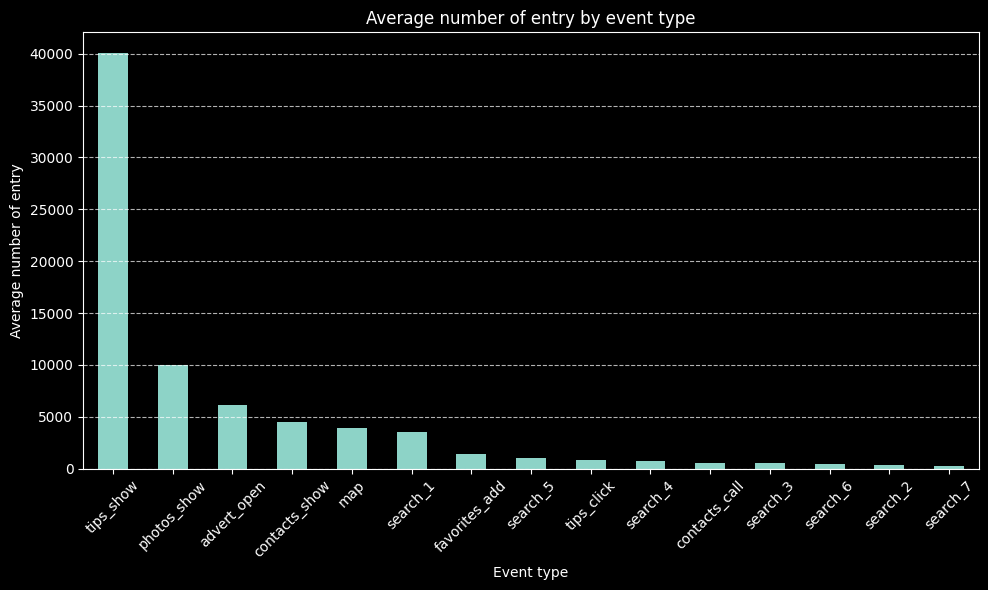

In [51]:
plt.figure(figsize=(10, 6))
mob['event_name'].value_counts().plot(kind='bar')
plt.title('Average number of entry by event type')
plt.xlabel('Event type')
plt.ylabel('Average number of entry')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The `Tips_show` event occurs too often, which implies its automatic nature, and the recommendations are displayed by users constantly in the process of using the application.Since we are interested in user actions, and the display of recommendations does not depend on them, this event is not suitable for analysis.

There is no initial event that could be used as a starting point for the funnel and accurately reflect the number of visits to the application.For example, the "opening of the main page".

The event `search_1` is much more common than others, which probably indicates interaction with the search bar, while the remaining 6 search events are more likely to be more specialized actions, such as the use of filters and others.There are few such specialized events, so to simplify them, they can be combined into one event.

In [52]:
mob_with_tips_show = mob.copy()
mob = mob[mob['event_name'] != 'tips_show']
mob.loc[mob['event_name'] == 'search_1', 'event_name'] = 'search_simple'
mob.loc[mob['event_name'].isin(['search_2', 'search_3', 'search_4', 'search_5', 'search_6', 'search_7']), 'event_name'] = 'search_special'

### Let's see how much on average events are per user

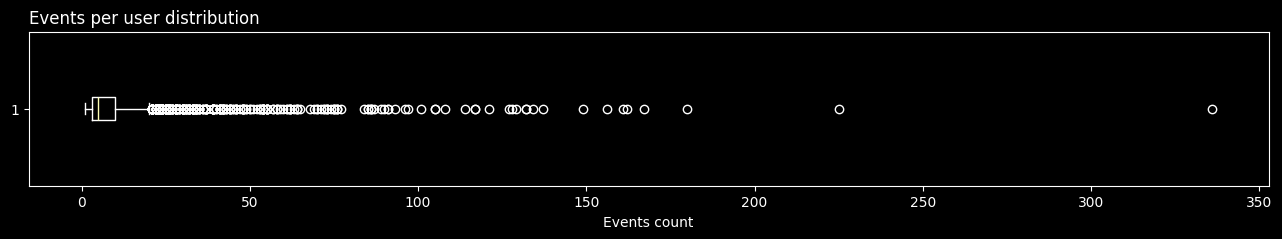

In [53]:
events_by_user = mob.groupby('user_id').agg(event_count = ('event_time', 'count')).reset_index()

plt.figure(figsize=(16, 2))
plt.title('Events per user distribution', loc='left')
plt.boxplot(events_by_user['event_count'], vert=False)
plt.xlabel('Events count')
plt.show();

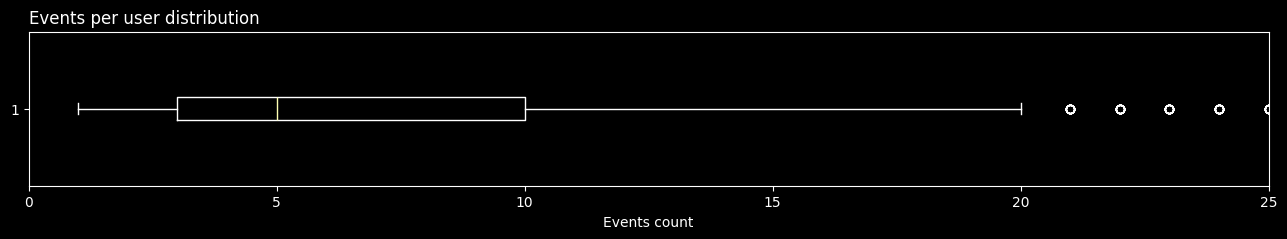

count   3586.0000
mean       9.5209
std       16.3181
min        1.0000
25%        3.0000
50%        5.0000
75%       10.0000
max      336.0000
Name: event_count, dtype: float64

In [54]:
plt.figure(figsize=(16, 2))
plt.title('Events per user distribution', loc='left')
plt.boxplot(events_by_user['event_count'], vert=False)
plt.xlabel('Events count')
plt.xlim(0, 25)
plt.show();

display(events_by_user['event_count'].describe())

There are events per user:
- Average - 16;
- Minimum - 1;
- Maximum - 336;
- Mediana - 5

### Let's look at the distribution of data on the source from which the user installed the application

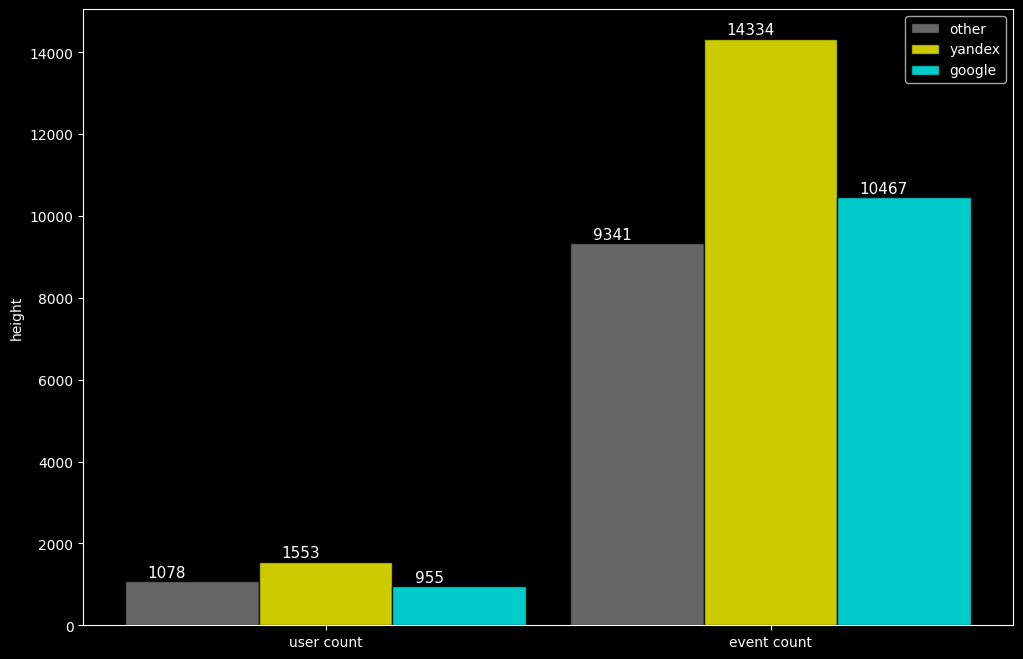

In [55]:
barWidth = 0.3
bars = [[] * n for n in range(len(mob['mobile_source'].unique()))]

for i in range(len(mob['mobile_source'].unique())):
    bars[i].append(mob.groupby('mobile_source', sort=False).agg({'user_id': 'nunique'})['user_id'][i])
    bars[i].append(mob.groupby('mobile_source', sort=False).agg({'user_id': 'count'})['user_id'][i])

r = [[0] * n for n in range(len(mob['mobile_source'].unique()))]
r[0] = np.arange(len(bars[0]))

for i in range(1, len(mob['mobile_source'].unique())):
    r[i] = [x + barWidth for x in r[i-1]]

plt.figure(figsize=(12, 8))
plt.bar(r[0], bars[0], width = barWidth, color = 'grey', edgecolor = 'black', capsize=7, alpha=0.8, label=mob['mobile_source'].unique()[0])
plt.bar(r[1], bars[1], width = barWidth, color = 'yellow', edgecolor = 'black', capsize=7, alpha=0.8, label=mob['mobile_source'].unique()[1])
plt.bar(r[2], bars[2], width = barWidth, color = 'cyan', edgecolor = 'black', capsize=7, alpha=0.8, label=mob['mobile_source'].unique()[2])

plt.xticks([r + barWidth for r in range(len(bars[0]))], ['user count', 'event count'])
plt.ylabel('height')
plt.legend()
for i in range(len(bars)):
    for j in range(len(bars[0])):
        plt.text(x = r[i][j]-0.1 , y = bars[i][j]+100, s = bars[i][j], size = 11)
plt.show()

Yandex leads in both indicators.Google gives less unique users than other sources (not counting Yandex), but these users are a little more active

### Let's look at the distribution of events in time

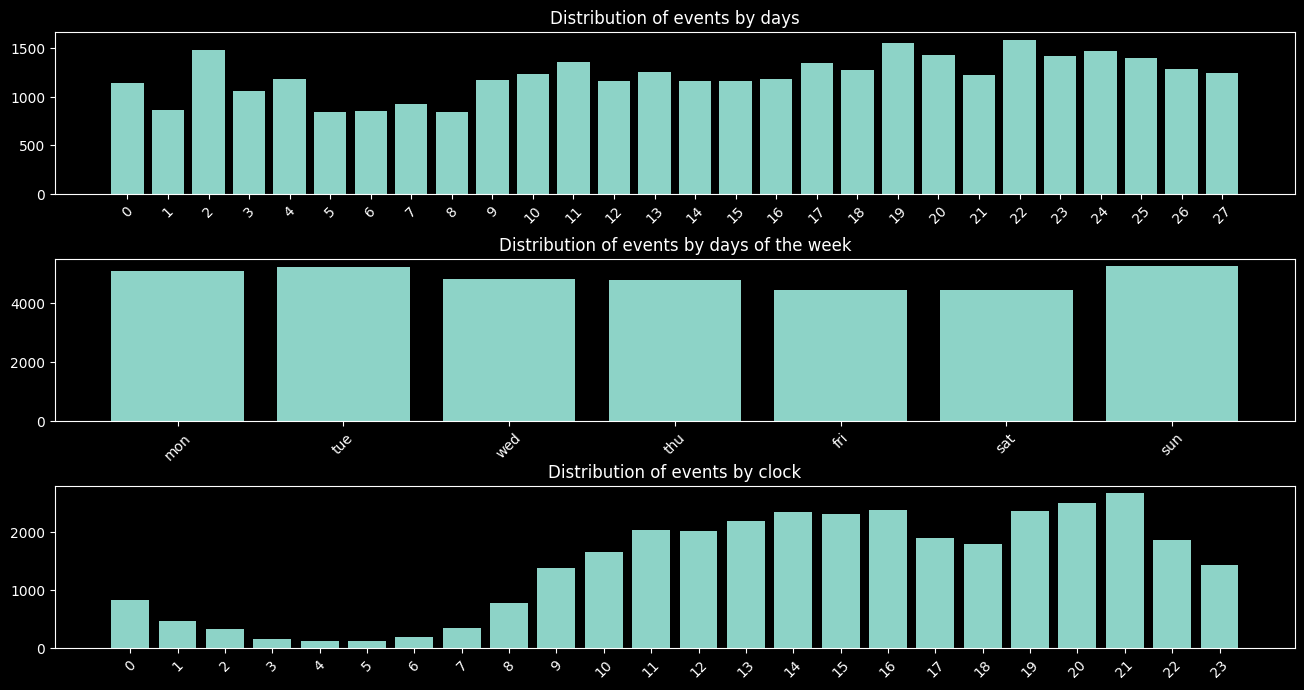

In [56]:
period = (mob['event_time'].max() - mob['event_time'].min()).days
week = ('mon','tue','wed','thu','fri','sat','sun')
pos_p = np.arange(period+1)
pos_w = np.arange(len(week))
pos_h = np.arange(24)


fig = plt.figure(figsize=(16, 8))
plt.subplot(3,1, 1)
plt.bar(pos_p, mob['event_time'].dt.day.value_counts().sort_index())
plt.title('Distribution of events by days')
plt.xticks(pos_p, pos_p, rotation=45)

plt.subplot(3,1, 2)
plt.bar(pos_w, mob['event_time'].dt.weekday.value_counts().sort_index())
plt.title('Distribution of events by days of the week')
plt.xticks(pos_w, week, rotation=45)

plt.subplot(3,1, 3)
plt.bar(pos_h, mob['event_time'].dt.hour.value_counts().sort_index())
plt.title('Distribution of events by clock') 
plt.xticks(pos_h, pos_h, rotation=45)

plt.subplots_adjust(hspace = 0.4)
plt.show();

At night, the application is used much less often and the peak falls at 9 pm.There is also a failure at 5-6 pm.

No strong deviations are visible.There is a daily seasonality.In view of a small period of time by time, making a decomposition and identifying trends is not reasonable.

## Sessions

#### Split the events in sessions

According to the standard of [OWASP (Open Web Application Security Project)](https://cheatsheetseries.owasp.org/cheatsheets/Session_Management_Cheat_Sheet.html#:~:text=Both%20the%20idle,and%208%20hours) it is recommended to use the interval betweensessions from 2 to 5 minutes for applications with a high level of security and from 15 to 30 minutes for ordinary applications.Our mobile application "Unnecessary things" does not require a high level of protection, so we have chosen the time of inactivity of users for 20 minutes.However, in order to find out the more accurate time of the session of this application, it is best to contact the developers.

In [57]:
g = (mob.groupby('user_id')['event_time'].diff() > pd.Timedelta('20Min')).cumsum()
mob = mob.sort_values(['user_id', 'event_time'])
mob['session_id'] = mob.groupby(['user_id', g], sort=False).ngroup() + 1

#### Let's look at the sessions received

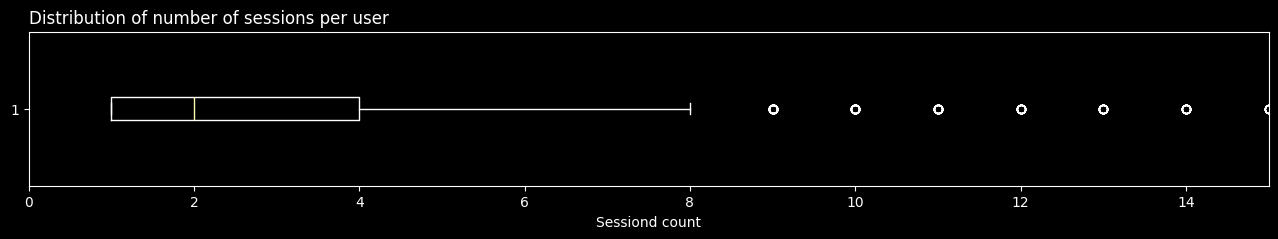

In [58]:
plt.figure(figsize=(16, 2))
plt.title('Distribution of number of sessions per user', loc='left')
plt.boxplot(mob.groupby('user_id')['session_id'].nunique(), vert=False)
plt.xlabel('Sessiond count')
plt.xlim(0, 15)
plt.show();

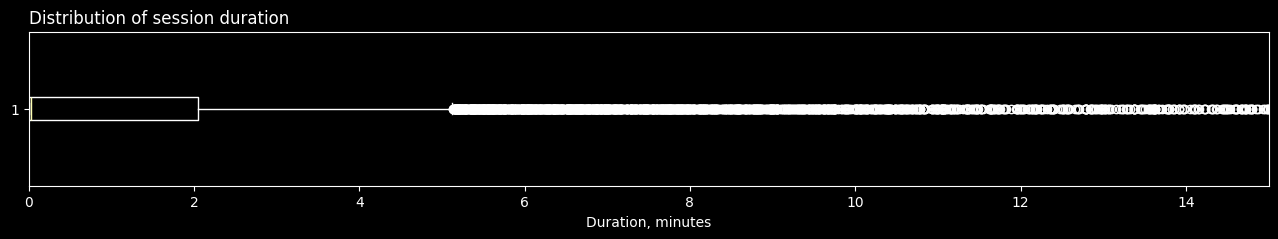

In [59]:
plt.figure(figsize=(16, 2))
plt.title('Distribution of session duration', loc='left')
plt.boxplot(mob.groupby(['session_id', 'user_id'])
            .agg(time_span=('event_time', lambda x: (x.max() - x.min())/np.timedelta64(60, 's'))), vert=False)
plt.xlabel('Duration, minutes')
plt.xlim(0, 15)
plt.show();

The bulk of people use the application up to 2 minutes 1-4 times a day.

The duration of the session may depend on various factors. However, usually for mobile applications, the goal is to ensure the comfortable and productive interaction of users with the application. This means that the duration of the session should be sufficient to perform the main tasks of users, but not too long so as not to tire users.

In the case of a mobile application for the exchange of things, a good duration of the session can be approximately 5-15 minutes.This interval gives users enough time to view proposals, adding or viewing their ads, communicating with other users and performing other basic actions, but not so long as to cause fatigue or boredom.

I would advise you to think about holding users.

## holding

In [60]:
profiles = (mob.sort_values(by=['user_id', 'event_time']).groupby('user_id')
            .agg({'event_time': 'first'}).rename(columns={'event_time': 'first_join'}).reset_index())
profiles['dt'] = pd.to_datetime(profiles['first_join'].dt.date)
profiles['month'] = profiles['first_join'].dt.strftime('%m')
last_date = mob['event_time'].max().date() - timedelta(days=13)
profiles = profiles.query('dt <= @last_date')
profiles = profiles.merge(mob[['user_id', 'event_time']], on='user_id', how='left')
profiles['lifetime'] = (profiles['event_time'] - profiles['first_join']).dt.days
profiles_pivot = profiles.pivot_table(index=['dt'], columns='lifetime', values='user_id', aggfunc='nunique')
cohort_sizes = (profiles.groupby('dt').agg({'user_id': 'nunique'}).rename(columns={'user_id': 'cohort_size'}))
profiles_pivot = cohort_sizes.merge(profiles_pivot, on='dt', how='left').fillna(0)
profiles_pivot = profiles_pivot.div(profiles_pivot['cohort_size'], axis=0)
profiles_pivot = profiles_pivot[['cohort_size'] + list(range(14))]
profiles_pivot['cohort_size'] = cohort_sizes
profiles_pivot.index = profiles_pivot.index.strftime('%m/%d')

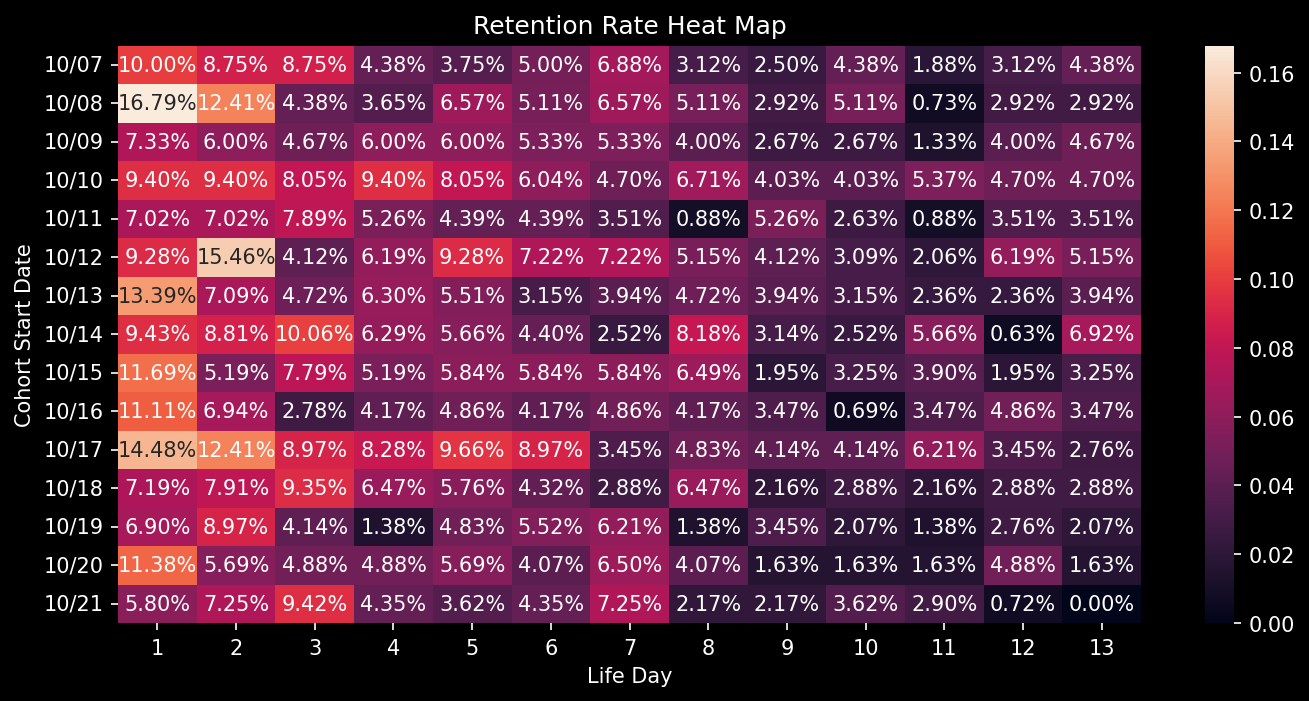

In [61]:
plt.figure(figsize=(11,5),dpi=150)
sns.heatmap(profiles_pivot.drop(['cohort_size', 0],axis=1), annot=True, fmt = '.2%')
plt.title('Retention Rate Heat Map')
plt.xlabel("Life Day")
plt.ylabel("Cohort Start Date");

Retention after a week is less than 8%, and after 2 weeks in some places it is below 1%. Some days stand out for attracting more people, but this doesn't affect retention, after a week these cohorts are compared with the rest of the days.

### DAU

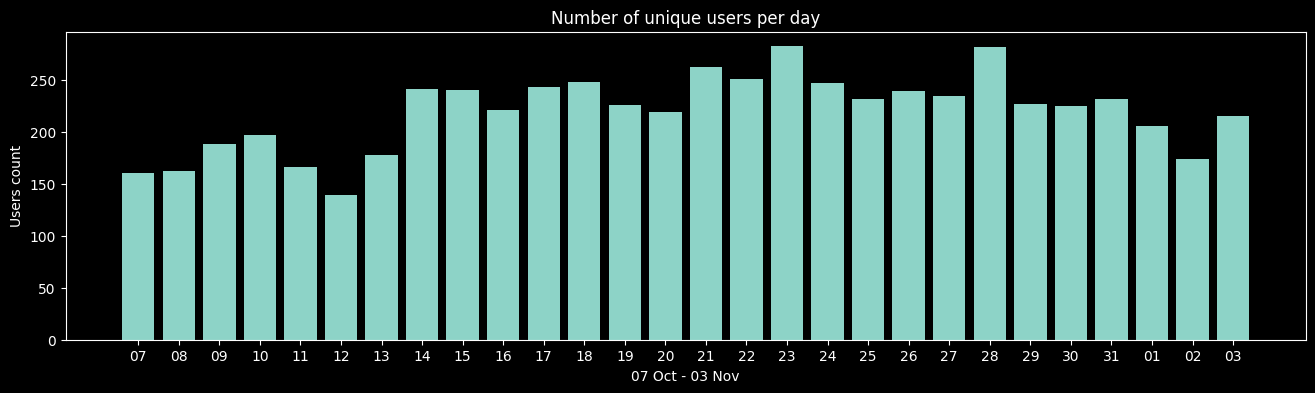

In [62]:
dau = mob.pivot_table(index=pd.DatetimeIndex(mob['event_time']).date, values='user_id', aggfunc='nunique')

plt.figure(figsize=(16,4))
plt.bar([i.strftime('%d') for i in dau.index], dau['user_id'])
plt.title('Number of unique users per day')
plt.xlabel(str(dau.index[0].strftime('%d %b')) + ' - ' + str(dau.index[-1].strftime('%d %b')))
plt.ylabel("Users count");

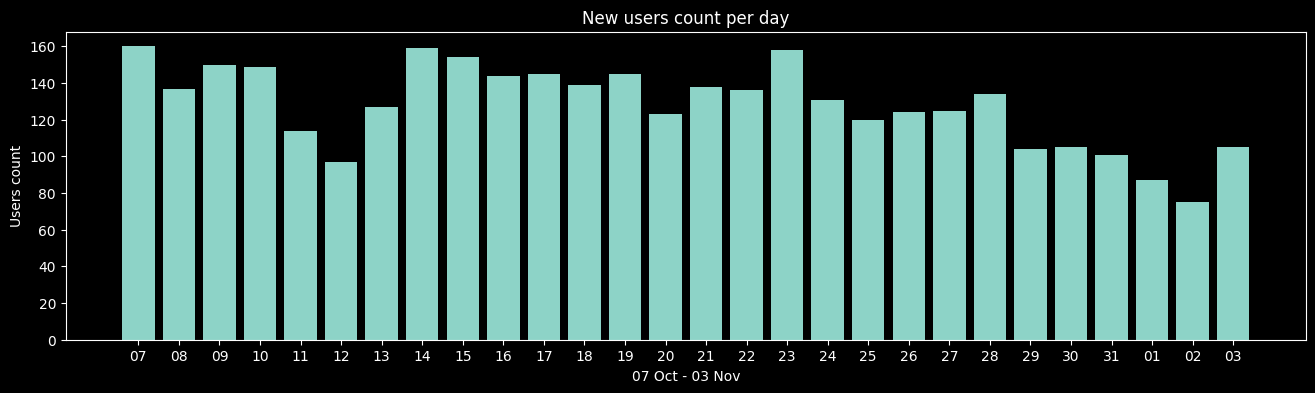

In [63]:
new_users = []
def count_new(users):
    count_new_users = 0
    for user in users:
        if user not in new_users:
            new_users.append(user)
            count_new_users += 1
    return count_new_users
new_users_pivot = mob.pivot_table(index=pd.DatetimeIndex(mob['event_time']).date, values='user_id', aggfunc=[lambda x: count_new(x)])

plt.figure(figsize=(16,4))
plt.bar([i.strftime('%d') for i in new_users_pivot.index], new_users_pivot[('<lambda>', 'user_id')])
plt.title('New users count per day')
plt.xlabel(str(dau.index[0].strftime('%d %b')) + ' - ' + str(dau.index[-1].strftime('%d %b')))
plt.ylabel("Users count");

In general, there is a trend to increase unique users.The influx of new users at the beginning of the week and a failure to the weekend is noticeable, but in general, the Drand is visible to reduce new users.It is worth working out a marketing strategy

### Search for scripts

#### Delete duplicates of events as part of one session

In [64]:
mob.drop_duplicates(subset=['session_id', 'event_name'], keep='first', inplace=True, ignore_index=True)

#### Add columns with numbering steps and knots

We need columns (source -> target), we will need to build a Sankey diagram

In [65]:
mob['step'] = mob.groupby('session_id').cumcount() + 1
mob['target_event'] = mob.groupby('session_id')['event_name'].shift(-1)
mob = mob[mob['step'] <= 7].copy().reset_index(drop=True)
mob = mob[['session_id', 'step', 'event_time', 'user_id', 'mobile_source', 'event_name', 'target_event']]
mob.head(10)

,session_id,step,event_time,user_id,mobile_source,event_name,target_event
0,1,1,2019-10-09 18:33:55.577963,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,map,NaN
1,2,1,2019-10-21 19:53:38.767230,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,map,NaN
2,3,1,2019-10-21 19:56:49.417415,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,map,NaN
3,4,1,2019-10-22 11:18:14.635436,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,map,NaN
4,5,1,2019-10-22 11:25:33.508919,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,map,NaN
5,6,1,2019-10-19 21:34:33.849769,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,search_simple,NaN
6,7,1,2019-10-19 21:35:19.296599,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,search_simple,photos_show
7,7,2,2019-10-19 21:40:38.990477,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,photos_show,NaN
8,8,1,2019-10-19 21:42:13.837523,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,photos_show,NaN
9,9,1,2019-10-19 21:44:55.589731,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,photos_show,NaN


#### Prepare data for the Sankey diagram

In [66]:
def lists_for_plot(df):
    source_indexes = {}
    count = 0

    for no, step in enumerate(df['step'].unique().tolist()):
        source_indexes[no + 1] = {
            'sources': df[df['step'] == step]['event_name'].unique().tolist(),
            'sources_index': [],
        }
        for _ in range(len(source_indexes[no+1]['sources'])):
            source_indexes[no+1]['sources_index'].append(count)
            count += 1

    for key, value_ in source_indexes.items():
        source_indexes[key]['sources_dict'] = {}
        for name, no in zip(value_['sources'], source_indexes[key]['sources_index']):
            source_indexes[key]['sources_dict'][name] = no 

    sources = []
    targets = []
    values = []
    labels = []
    link_color = []
    link_text = []
    colors = {}
    for label in mob['event_name'].unique():
        r, g, b = np.random.randint(255, size=3)            
        colors[label] = f'rgba({r}, {g}, {b}, 1)'

    for step in sorted(mob['step'].unique()):
        if step + 1 not in source_indexes:
            continue

        temp_dict_source = source_indexes[step]['sources_dict']
        temp_dict_target = source_indexes[step+1]['sources_dict']

        for source, index_source in temp_dict_source.items():
            for target, index_target in temp_dict_target.items():           
                temp_df = mob[(mob['step'] == step)&(mob['event_name'] == source)&(mob['target_event'] == target)]
                value = len(temp_df)
                if value > 10:
                    sources.append(index_source)
                    targets.append(index_target)
                    values.append(value)
                    link_color.append(colors[source].replace(', 1)', ', 0.2)'))

    labels = []
    colors_labels = []
    for value__ in source_indexes.values():
        for name in value__['sources']:
            labels.append(name)
            colors_labels.append(colors[name])

    zip_lists = list(zip(sources, targets, values))
    perc_values = []
    unique_dict = {}

    for source, target, value in zip_lists:
        if source not in unique_dict:
            unique_dict[source] = 0
            for sr, tg, vl in zip_lists:
                if sr == source:
                    unique_dict[source] += vl

    for source, target, value in zip_lists:
        perc_values.append(round(100 * value / unique_dict[source], 1))

    link_text = [f"{perc}%" for perc in perc_values]
    return {'sources': sources, 
            'targets': targets, 
            'values': values, 
            'labels': labels, 
            'colors_labels': colors_labels, 
            'link_color': link_color, 
            'link_text': link_text}
    
data_for_plot = lists_for_plot(mob)

#### Build the Sankey diagram

In [67]:
fig = go.Figure(data=[go.Sankey(
    domain = dict(
      x =  [0,1],
      y =  [0,1]
    ),
    orientation = "h",
    valueformat = ".0f",
    node = dict(
      pad = 50,
      thickness = 15,
      line = dict(color = "black", width = 0.1),
      label = data_for_plot['labels'],
      color = data_for_plot['colors_labels']
    ),
    link = dict(
      source = data_for_plot['sources'],
      target = data_for_plot['targets'],
      value = data_for_plot['values'],
      label = data_for_plot['link_text'],
      color = data_for_plot['link_color']
  ))])
fig.update_layout(title_text="Sankey Diagram", font_size=10, width=1000, height=1000)
chart_studio.plotly.plot(fig, filename = 'Sankey_for_yandex_da_project', auto_open=False)
fig.show()

On the [diagram](https://chart-studio.plotly.com/~psimera/1/#plot) the distribution of the main scenarios is visible.It is noteworthy that no more than 4 stages, and more often at all, the user is enough for the user to get to the target - `contacts_show`.

For example:

- `search_simple` -> `photos_show` -> `contacts_show` (simple search -> View photos -> View contacts)

- `advert_open` -> `photos_show` - > `contacts_show` (Opening Announcement -> View photos -> View Contacts)

- `photos_show` - > `contacts_show` (viewing photos -> View contacts)

- `search_simple` -> `contacts_show` (simple search -> View contacts)

- `search_special` -> `advert_open` -> `contacts_show` (Specific search -> Opening of the ad -> View contacts)

### Funnel of events

#### Create a function for building funnels

In [68]:
def funnel(df, n, *args):
    event = df[df['event_name'] == args[0]]
    users_ids = event['user_id'].unique()
    funnel_df = pd.DataFrame({'unique_users' : len(event['user_id'].unique()),
                        'general_users' : event.shape[0]},
                        index=[args[0]])
    
    for i in range(1, len(args)):
        event = df[(df['user_id'].isin(users_ids)) & (df['event_name'] == args[i])]
        users_ids = event['user_id'].unique()
        new_row = pd.DataFrame({'unique_users' : len(event['user_id'].unique()),
                                'general_users' : event.shape[0]},
                                index=[args[i]])
        funnel_df = pd.concat([funnel_df,new_row.loc[:]])

    fig = go.Figure(go.Funnel(y = list(funnel_df.index), x = list(funnel_df['unique_users']),
        textinfo = "value+percent initial+percent previous",
        opacity = 0.65, marker = {"color": ['teal', 'orange', 'blue', 'green', 'silver']}))

    fig.update_layout(title=dict(text=f'Event funnel {str(n)}', x=0.5), yaxis_title='Stages')
    chart_studio.plotly.plot(fig, filename = f'funnel_for_yandex_da_{n}', auto_open=False)
    fig.show()

## Funnels

In [69]:
funnel(mob, 1, 'search_simple', 'photos_show', 'contacts_show')

[Funnel 1](https://chart-studio.plotly.com/~psimera/3/#/). a rather large percentage looks at the photo after the search, but only about a third then looks at the contacts

In [70]:
funnel(mob, 2, 'advert_open', 'photos_show', 'contacts_show')

[Funnel 2](https://chart-studio.plotly.com/~psimera/8/#/). Only 10% of users go from the announcement card, but 50% of them are watching contacts, that is, people looking atPhotos, more often than others, look at contacts.Perhaps it is worthwhile to more actively involve people in viewing photos, and those who give ads to stimulate up to upload good photos

In [71]:
funnel(mob, 3, 'photos_show', 'contacts_show')

[Funnel 3](https://chart-studio.plotly.com/~psimera/5/#/). If you exclude the search and view the photos immediately to contacts, about a third, about a third

In [72]:
funnel(mob, 4, 'search_simple', 'contacts_show')

[Funnel 4](https://chart-studio.plotly.com/~psimera/10/#/). Standard search gives us a third from users who have used to contact the contacts

In [73]:
funnel(mob, 5, 'search_special', 'advert_open', 'contacts_show')

[Funnel 5](https://chart-studio.plotly.com/~psimera/12/#/). From specific options for searching for a card, a third goes on, but only 1/5 of them passes further and only 6% and only 6%From the searches

## Check Hypothesis

### Hypothesis 1

Group A: perform actions `tips_show` and `tips_click`
Group B: Do only `tips_show`

Hypothesis: Conversion into contact views varies in these two groups.

Zero: differences in the conversion between groups A and B no

Alternative: Differences are

In [74]:
tips_show_users = set(mob_with_tips_show[mob_with_tips_show['event_name'] == 'tips_show']['user_id'])
tips_click_users = set(mob_with_tips_show[mob_with_tips_show['event_name'] == 'tips_click']['user_id']) 
contacts_show_users = set(mob_with_tips_show[mob_with_tips_show['event_name'] == 'contacts_show']['user_id']) 

contacts_show_users_count_a1 = len(tips_show_users.intersection(tips_click_users, contacts_show_users))
users_count_a1 = len(tips_show_users.intersection(tips_click_users))

a1_prop = contacts_show_users_count_a1 / users_count_a1
print(f'Conversion rate in group A: {round(a1_prop, 2)}')

users_count_b1 = tips_show_users.difference(tips_click_users )
contacts_show_users_count_b1= len(users_count_b1.intersection(contacts_show_users))
users_count_b1 = len(users_count_b1)
b1_prop = contacts_show_users_count_b1 / users_count_b1
print(f'Conversion rate in group B: {round(b1_prop, 2)}')

p1_combined = (contacts_show_users_count_a1 + contacts_show_users_count_b1) / (users_count_a1 + users_count_b1)

alpha = .05
diff = a1_prop - b1_prop
z_value = diff / (p1_combined * (1 - p1_combined) * (1/users_count_a1 + 1/users_count_b1)) ** 0.5
distr = st.norm(0, 1) 

p_value = (1- distr.cdf(abs(z_value))) * 2
print('p-value:', round(p_value, 8))
if p_value < alpha:
    print('Reject the null hypothesis')
else:
    print('Failure to reject the null hypothesis')

Conversion rate in group A: 0.31
Conversion rate in group B: 0.17
p-value: 1e-08
Reject the null hypothesis


The differences are statistically significant.We reject the zero hypothesis

## Hypothesis 2

Group A: perform actions `Photos_show` and `Contacts_show`

Group B: Only `Contacts_show`

Check the hypothesis: the conversion into contact views varies in these two groups

Zero: There are no differences in the conversion between groups A and B

Alternative: differences between groups are

In [75]:
photos_show_users = set(mob[mob['event_name'] == 'photos_show']['user_id'])
temp = mob[~mob['user_id'].isin(photos_show_users)]
no_photos_show_users = set(temp['user_id'])
contacts_show_users = set(mob[mob['event_name'] == 'contacts_show']['user_id'])

contacts_show_users_count_a2 = len(photos_show_users.intersection(contacts_show_users))
users_count_a2 = len(photos_show_users)

a2_prop = contacts_show_users_count_a2 / users_count_a2
print(f'Conversion rate in group A: {round(a2_prop, 2)}')

contacts_show_users_count_b2 = len(no_photos_show_users.intersection(contacts_show_users))
users_count_b2 = len(no_photos_show_users)
b2_prop = contacts_show_users_count_b2 / users_count_b2
print(f'Conversion rate in group B: {round(b2_prop, 2)}')

p2_combined = (contacts_show_users_count_a2 + contacts_show_users_count_b2) / (users_count_a2 + users_count_b2)

alpha = .01 
diff = a2_prop - b2_prop
z_value = diff / (p2_combined * (1 - p2_combined) * (1/users_count_a2 + 1/users_count_b2)) ** 0.5
distr = st.norm(0, 1) 

p_value = (1- distr.cdf(abs(z_value))) * 2
print('p-value:', round(p_value, 8))
if p_value < alpha:
    print('Reject the null hypothesis')
else:
    print('Failure to reject the null hypothesis')

Conversion rate in group A: 0.31
Conversion rate in group B: 0.26
p-value: 0.00133425
Reject the null hypothesis


Despite the fact that the values ​​of 31% and 26% seem to be relatives, the test shows that this difference is statistically significant and users who viewed photos are more often converted into viewing contacts

## Conclusion

What was done:

The connection of the target event `View contacts and other user actions was analyzed.

The following actions were performed in stages for this:

* Processing data, including;
* Renaming columns
* Transformation of the type of column data `event_time` into date format and time
* Removing implicit duplicates in the form of events `contacts_show` and `show_contacts`

* Data analysis;
* At our disposal information from `07 Oct 2019` according to `03 nov 2019`, that is, almost in a month.Data begins on Monday.
* The conversion to the target event is 22.85% of the total number of users
* It was decided to exclude the event `tips_show`, since it is automatic and does not reflect user activity.However, it was used to check the hypothesis given in the TK.
* Events related to search are very rare.The only event `search_1`, found quite often, was announced as `search_simple`.It was decided to consider the rest as a category of `Search_Special`, allegedly related to the use of filters.
* On average, one user accounts for 16 events with a minimum and a maximum of 1 and 336 events.With such a large scatter, it will be more useful to consider a median, which is 5 events per user.
* In terms of distribution of indicators among user sources, Yandex leads.Most users and arriving users carry out more events.Google gives less unique users than other sources (not counting Yandex), but these users are a little more active
* There is a clear daily seasonality.At night, the application is used much less often and the peak falls at 9 pm.There is also a failure at 5-6 pm
* In view of a small period of data on time, it was decided not to make a decomposition and not to identify the trends
* There is a more frequent visit to the application on Tuesday and Sunday, and the smallest on Friday and Saturday.
* The session was analyzed by taking the inaction of 20 minutes, based on the standards of [OWASP (Open Web Application Security Project)](https://cheatsheetseries.owasp.org/cheatsheets/Session_Management_Cheat_Sheet.html#:~:text=Both%20the%20idle,and%208%20hours)
* The bulk of people use the application up to 2 minutes 1-4 times a day.
* Croort analysis showed a low user retention.For example, retention by the 7th day was less than 8%, and by the 14th day-less than 1%.
* The number of new users per day tends to decrease.With a slight increase in the number of unique users.
* The distribution of the main scenarios is considered on the Sankei diagram.It is noteworthy that the scenarios are no more than 4 stages, and more often even 2 stages to the user enough to get to the target - `contacts_show`.
    * The following scenarios are highlighted and their funnels are analyzed:
    * `Simple search -> View photos -> View Contacts` -A rather large percentage looks at the photo after the search, but only about a third then looks at the contacts
    * `Opening of the announcement -> View photos -> View Contacts` -Only 10% of users go from the announcement cards in the photo, but of them 50% watch contacts, that is, people watching photographs, more often than others, look at contacts.Perhaps it is worthwhile to more actively involve people in viewing photos, and those who give ads to stimulate up to upload good photos
    * `View photos -> View contacts` - if you exclude the search and view the photos immediately to contacts, about the same percentage, about a third
    * `Simple search -> View Contacts` - Standard Search gives us a third of users who have used it, who have passed to the contacts
    * `Specific search -> Opening the ad -> View Contacts` -From specific options for searching for a card, a third passes, but only 1/5 of them and only 6% of the searches moved on to contacts.

* Verified hypotheses:
    * Statistically significant differences were found in the conversions of users performing the actions of `tips_show` and `tips_click` compared to users who make only `tips_show`.The conversion is higher in the first group
    * Statistically significant differences were found in the conversion of users viewing photos and not viewing them.The conversion is higher in the first group (31% versus 26%)


Recommendations:

* It is recommended to add logistics "Starting page".This will help improve the accuracy of user accounting and become a starting point for most analytical funnels.It will also become easier to track the frequency of user calls to the application at different times
* Attention should be paid to the development of the recommendations system
* It is necessary to bring the database to the general format in order to avoid duplication of events `contacts_show` and `show_contacts`
* It is recommended to rename events from `search_1` to `search_7` in more intuitive names or document their values